# SVM for Posture Recognition
### Accuracy - 84.2%

In [1]:
# importing necessary libraries
import numpy as np 
import pandas as pd
import os
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [2]:
Categories = ['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy']
print(len(Categories))
flat_data_arr=[]
target_arr=[]

datadir= "./Grape-Dataset/full"
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

4
loading... category : Grape___Black_rot
loaded category:Grape___Black_rot successfully
loading... category : Grape___Esca_(Black_Measles)
loaded category:Grape___Esca_(Black_Measles) successfully
loading... category : Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
loaded category:Grape___Leaf_blight_(Isariopsis_Leaf_Spot) successfully
loading... category : Grape___healthy
loaded category:Grape___healthy successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.421918,0.363095,0.390546,0.458421,0.399598,0.427049,0.458257,0.399433,0.426884,0.457119,...,0.657605,0.610546,0.649762,0.628341,0.581282,0.620498,0.642506,0.595447,0.634663,0
1,0.651520,0.624069,0.651520,0.675994,0.648543,0.675994,0.673687,0.646236,0.673687,0.673941,...,0.468812,0.406067,0.445283,0.482583,0.419838,0.459054,0.431948,0.369203,0.408419,0
2,0.456162,0.436554,0.424790,0.400052,0.380444,0.368679,0.479722,0.460114,0.448349,0.581849,...,0.787493,0.783571,0.775728,0.793782,0.789861,0.782018,0.783229,0.779308,0.771464,0
3,0.412534,0.392926,0.377239,0.434171,0.414563,0.398877,0.464969,0.445362,0.429675,0.449367,...,0.823007,0.823007,0.830850,0.825634,0.825634,0.833477,0.855134,0.855134,0.862977,0
4,0.599527,0.552468,0.560311,0.597948,0.550889,0.558732,0.525654,0.478595,0.486438,0.584533,...,0.733784,0.710254,0.710254,0.729342,0.705812,0.705812,0.724302,0.700773,0.700773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,0.669616,0.610793,0.622557,0.686733,0.627910,0.639674,0.695447,0.636624,0.648388,0.686726,...,0.737579,0.694442,0.710128,0.720913,0.677776,0.693462,0.733862,0.690725,0.706411,3
9023,0.733862,0.690725,0.706411,0.720913,0.677776,0.693462,0.737579,0.694442,0.710128,0.718838,...,0.695447,0.636624,0.648388,0.686733,0.627910,0.639674,0.669616,0.610793,0.622557,3
9024,0.217263,0.176494,0.176494,0.527665,0.480014,0.480014,0.581003,0.526133,0.526133,0.548046,...,0.710014,0.659034,0.694328,0.683311,0.632331,0.667625,0.716261,0.665280,0.700574,3
9025,0.283212,0.243689,0.267526,0.279077,0.240411,0.263390,0.274883,0.236258,0.259197,0.282256,...,0.548191,0.485446,0.489367,0.544356,0.481611,0.485533,0.541903,0.479158,0.483079,3


In [3]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Split Successfully')

Split Successfully


In [4]:
# training a rbf SVM classifier
from sklearn.svm import SVC
svm_model_rbf2 = SVC(kernel = 'rbf', C = 0.1).fit(x_train, y_train)
svm_predictions_rbf2 = svm_model_rbf2.predict(x_test)

In [5]:
# model accuracy for X_test 
accuracy_rbf2 = svm_model_rbf2.score(x_test, y_test)
accuracy_rbf2

0.8421926910299004

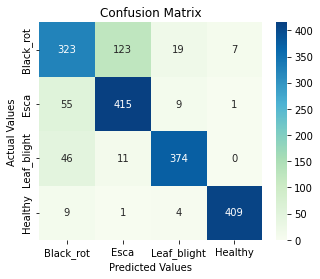

In [8]:
# creating a confusion matrix
cm_rbf2 = confusion_matrix(y_test, svm_predictions_rbf2)
cm_df = pd.DataFrame(cm_rbf2,
                     index = ['Black_rot', 'Esca', 'Leaf_blight', 'Healthy'], 
                     columns = ['Black_rot', 'Esca', 'Leaf_blight', 'Healthy'])
#Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt = "d", cmap = "GnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()